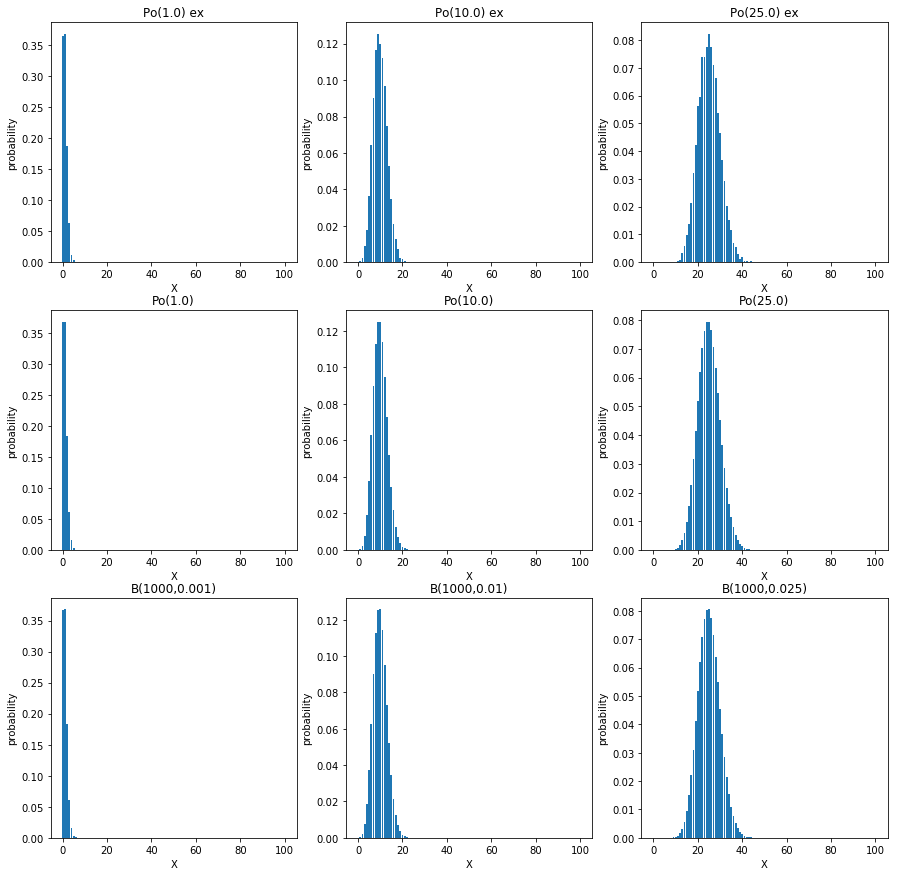

In [5]:
%matplotlib inline
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import comb

#ポアソン分布
#二項分布において、確率pが非常に小さい場合、p^xの値の近似精度が悪い。==> 異なる確率関数を用いる(ポアソンの少数の法則)
#二項分布の確率関数に対し、p = λ/n,n -> ∞ とした時、x回(x軸)成功する確率(y軸)の確率分布

#実験
def Binomial_EX(n,p):
    sample = np.random.rand(n)
    return len(np.where(sample < p)[0])
# (n = 1000,p = 0.001),(n=1000,p = 0.01),(n=1000,p=0.025)の3ケースで実験
fig,axes = plt.subplots(ncols=3,nrows=3,figsize=(15,15))
for p,i in zip([0.001,0.01,0.025],range(3)):
    freq = {i:0 for i in range(101)} # 確率pが小さいので100回以上成功することはないと見積もった。
    for j in range(10000):
        freq[Binomial_EX(1000,p)] += 1
    y = freq.values()
    y = list(map(lambda x:x/sum(y),y))
    axes[0,i].bar(list(range(101)),y,width=0.8)
    axes[0,i].set_title("Po({}) ex".format(1000*p))
    axes[0,i].set_xlabel("X")
    axes[0,i].set_ylabel("probability")
 
#理論
f = lambda m,x:math.exp(-m) * (m ** x)/math.factorial(x)
for p,i in zip([0.001,0.01,0.025],range(3)):
    y = list(map(f,[p*1000]*101,list(range(101))))
    axes[1,i].bar(list(range(101)),y,width=0.8)
    axes[1,i].set_title("Po({})".format(1000*p))
    axes[1,i].set_xlabel("X")
    axes[1,i].set_ylabel("probability")

#二項分布で計算すると...
f2 = lambda n,x,p:comb(n,x) * (p ** x) * ((1 - p) ** (n-x))
for p,i in zip([0.001,0.01,0.025],range(3)):
    y = list(map(f2,[1000]*101,list(range(101)),[p]*101))
    axes[2,i].bar(list(range(101)),y,width=0.8)
    axes[2,i].set_title("B(1000,{})".format(p))
    axes[2,i].set_xlabel("X")
    axes[2,i].set_ylabel("probability")

    